# STAT 201 Final Report

*Group Members: Devvrat Tiwari, Cindy Cui, Blasius Boniarga, Nilay Kumar, Richard Luo.*

# Artist Followers vs. Song Popularity on Spotify


# Introduction

What impacts a song’s popularity? Do bigger artists consistently release more popular songs? or are established, industry veterans able to get away with sub-par song releases? In the digital age, online influence and followers are often considered synonymous with success in various domains, including the music industry. This project aims to analyze data from Spotify's Top 200 Weekly Global Charts to explore the relationship between an artist's Spotify following and the popularity of their songs. 

Specifically, we seek to answer the question: **"Is there a significant difference in the median popularity of songs between artists with more than 1 million followers and those with fewer than 1 million followers?"**

Analyzing Spotify’s Global Top 200, we uncover the influence that the metric: “Spotify followers” had on “song popularity” in 2020 and 2021; however we see several inconsistencies, where a wide range of artists followers made the top 200 list, from as little as 4,883 followers, all the way to 83,337,783. We use 1 million followers as a benchmark to an artist's influence over mainstream as evidence from (Aguiar, Waldfogel, 2018) to indicate that artists reaching the one million follower point attain subjective credibility over the spotify atmosphere. Understanding this relationship may offer insights into the dynamics of online music consumption and marketing efficacy (Soares Araujo, Pinheiro de Cristo, Giusti, 2019). 

Our response variable for this question is the popularity of songs, which is a value between 0 and 100. The statistic we will calculate from our response variable is the median popularity score of songs for each category. We will also analyze the interquartile range of the popularity score. 

## Describing the Dataset
Our dataset includes all the songs that have been on the Top 200 Weekly (Global) charts of Spotify in 2020 & 2021. We consider our population to be any song released onto the internet, and our dataset to be our sample of this population.

Each song in our dataset is one observation, and the columns are features of the songs, such as the highest position that a song has been in the Spotify Top 200 Weekly Global Charts in 2020 and 2021, the number of times a song has made this chart, the overall tempo of the track, and more.

# Preliminary Results

We begin by analyzing our data. First, we load our libraries and set our seed. 

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readr)

set.seed(1)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Now we read our dataset from the web, and clean and wrangle it into a tidy format. We will use the two columns `Popularity` and `Artist Followers`.

In [6]:
#Loading the dataset
spotify_data <- read_csv("https://github.com/cinadia/stat-201-project/raw/main/data/spotify_dataset.csv", show_col_types = FALSE) %>%
    select("Artist Followers", "Popularity")

# Clean the data: Remove commas from 'Artist Followers' and convert to numeric
spotify_data$Artist.Followers <- as.numeric(gsub(",", "", spotify_data$`Artist Followers`))

# Remove NA values
spotify_data <- na.omit(spotify_data)

head(spotify_data)

Artist Followers Popularity Artist.Followers
1  3377762         100         3377762        
2  2230022          99         2230022        
3  6266514          99         6266514        
4 83293380          98        83293380        
5  5473565          96         5473565        
6  5473565          97         5473565

To further examine our data, we compute the base summary statistics for the followers and popularity of an Artist.

In [3]:
# Summary statistics for followers
followers_stats <- spotify_data %>%
  summarise(
    median_followers = median(Artist.Followers, na.rm = TRUE),
    mean_followers = mean(Artist.Followers, na.rm = TRUE),
    sd_followers = sd(Artist.Followers, na.rm = TRUE),
    min_followers = min(Artist.Followers, na.rm = TRUE),
    max_followers = max(Artist.Followers, na.rm = TRUE)
  )

# Print the followers summary statistics
print(followers_stats)

# Summary statistics for popularity
popularity_stats <- spotify_data %>%
  summarise(
    median_pop = median(Popularity, na.rm = TRUE),
    mean_pop = mean(Popularity, na.rm = TRUE),
    sd_pop = sd(Popularity, na.rm = TRUE),
    min_pop = min(Popularity, na.rm = TRUE),
    max_pop = max(Popularity, na.rm = TRUE)
  )

# Print the popularity summary statistics
print(popularity_stats)

# A tibble: 1 × 5
  median_followers mean_followers sd_followers min_followers max_followers
             <dbl>          <dbl>        <dbl>         <dbl>         <dbl>
1          6852509      14716903.    16675789.          4883      83337783
# A tibble: 1 × 5
  median_pop mean_pop sd_pop min_pop max_pop
       <dbl>    <dbl>  <dbl>   <dbl>   <dbl>
1         73     70.1   15.8       0     100


Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


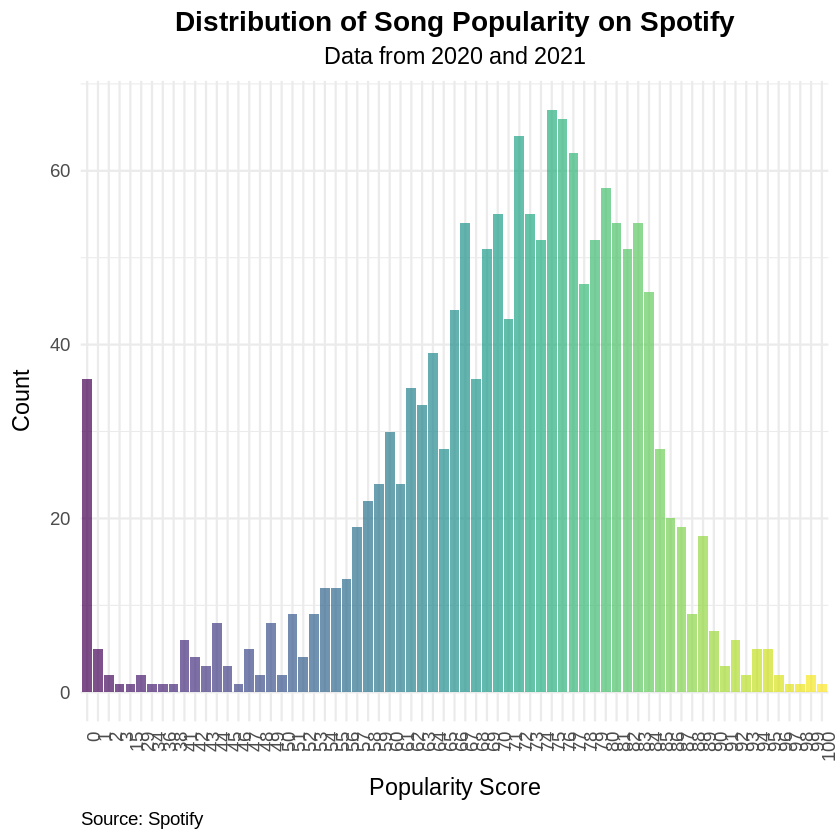

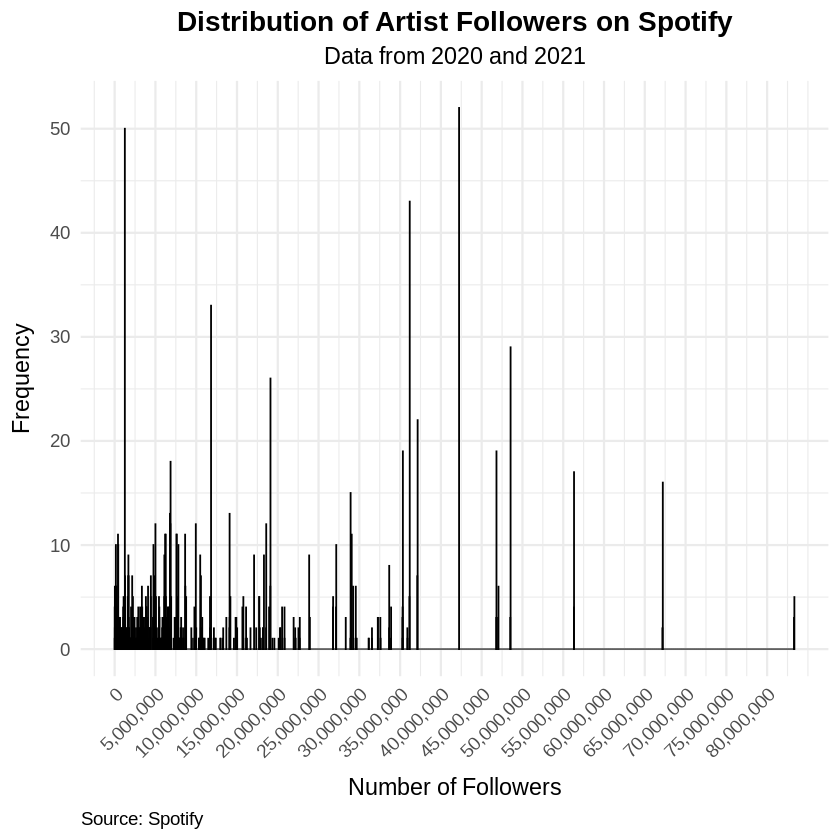

In [4]:
#Bar chart for popularity

popularity_dist <- spotify_data %>%
    ggplot(aes(x = factor(Popularity), fill = factor(Popularity))) +
    geom_bar(show.legend = FALSE, alpha = 0.7) +
    scale_fill_viridis_d() +
    labs(
        x = "Popularity Score",
        y = "Count",
        title = "Distribution of Song Popularity on Spotify",
        subtitle = "Data from 2020 and 2021",
        caption = "Source: Spotify"
    ) +
    theme_minimal(base_size = 14) +
    theme(
        plot.title = element_text(face = "bold", hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0),
        axis.title.x = element_text(margin = margin(t = 10)),
        axis.title.y = element_text(margin = margin(r = 10)),
        axis.text.x = element_text(angle = 90, hjust = 1)
    )

popularity_dist


# Histogram for the number of followers
followers_dist <- spotify_data %>%
    ggplot(aes(x = Artist.Followers, fill = ..count..)) +
    geom_histogram(binwidth = 5000, color = "black", alpha = 0.7) +
    scale_fill_gradient(low = "lightgreen", high = "darkgreen") +
    scale_x_continuous(
        labels = scales::comma,
        breaks = seq(0, max(spotify_data$Artist.Followers, na.rm = TRUE), by = 5e6) # Breaks at every 5 million
    ) +
    labs(
        x = "Number of Followers",
        y = "Frequency",
        title = "Distribution of Artist Followers on Spotify",
        subtitle = "Data from 2020 and 2021",
        caption = "Source: Spotify"
    ) +
    theme_minimal(base_size = 14) +
    theme(
        plot.title = element_text(face = "bold", hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0),
        axis.title.x = element_text(margin = margin(t = 10)),
        axis.title.y = element_text(margin = margin(r = 10)),
        axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none"
    )

followers_dist

For the "Distribution of Song Popularity on Spotify" graph, the histogram displayed illustrates the distribution of song popularity scores on Spotify, aggregating data from the years 2020 and 2021. Observing the shape of the distribution, which is slight left-skewed, we note a great concentration of songs falling below 1, with a gradual increase in the number of songs as the popularity score increases, until we reach a bell like curve. This skewness suggests that while most songs achieve a modest level of popularity, fewer songs reach the higher echelons of popularity scores on Spotify.

For the "Distribituion of Artist Followers on Spotify" graph, this graph visualizing the distribution of artist followers on Spotify, with data compiled from the years 2020 and 2021. Upon analysis, we notice a significant range in the number of followers, with the vast majority of followers falling below the 20 million mark while others accumulate a substantial following of 20 million plus. This indicates that a large number of artists have a relatively smaller follower base.


# A tibble: 2 × 2
  Artist.Followers.Category Median.Popularity
  <chr>                                 <dbl>
1 <= 1M                                    76
2 > 1M                                     72


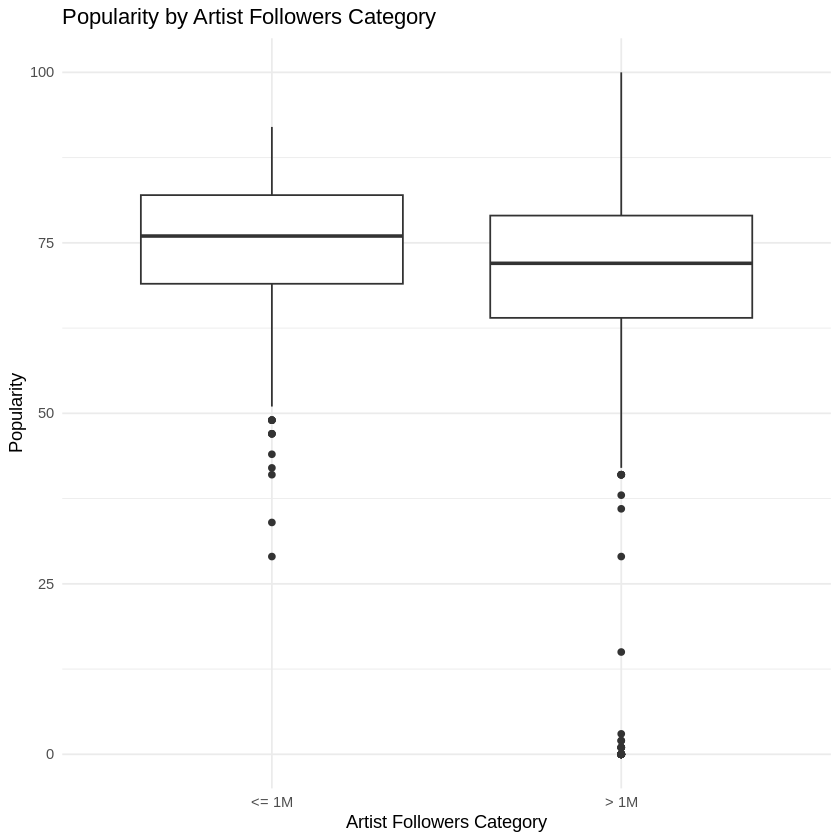

In [7]:
# Load the necessary libraries
library(tidyverse)  # for data manipulation
library(ggplot2)    # for plotting

# Clean the 'Artist Followers' data by removing commas and converting to numeric
spotify_data$Artist.Followers <- as.numeric(gsub(",", "", spotify_data$`Artist Followers`))

# Remove rows with NA values in 'Artist Followers'
spotify_data <- na.omit(spotify_data)

# Categorize artists based on their number of followers
spotify_data$Artist.Followers.Category <- ifelse(spotify_data$Artist.Followers > 1000000, "> 1M", "<= 1M")

# Compute the median popularity score for each category
median_popularity_by_followers_category <- spotify_data %>%
  group_by(Artist.Followers.Category) %>%
  summarize(Median.Popularity = median(Popularity, na.rm = TRUE))

# Output the median popularity for each category
print(median_popularity_by_followers_category)

# Create a boxplot for visual comparison
ggplot(spotify_data, aes(x = Artist.Followers.Category, y = Popularity)) +
  geom_boxplot() +
  labs(title = "Popularity by Artist Followers Category",
       x = "Artist Followers Category", y = "Popularity") +
  theme_minimal()

This visualization demonstrates the spread and sample statistic of our two experimental categories. Within Less than 1 million, we see a median popularity score of 76, while above 1 million scores a 72 with a higher variation in spread. The box plot visualization indicates that artists with a low follower base will typically have to have better music (popularity score) in order to even crack the top 200 list. This is indication that an artists **starpower**, from online followings, allow objectively worse songs to perform better in the global ranking. 


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


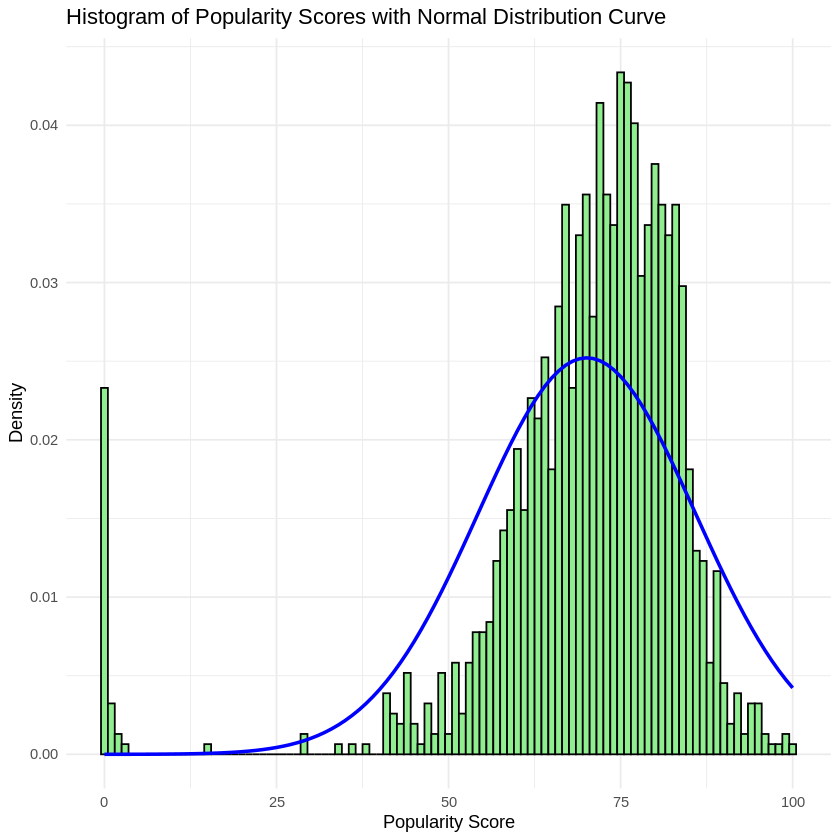

In [8]:
# Histogram with Normal Distribution Curve for Popularity
popularity_hist_with_curve <- spotify_data %>%
  ggplot(aes(x = Popularity)) +
  geom_histogram(aes(y = ..density..), binwidth = 1, fill = "lightgreen", color = "black") +
  stat_function(fun = dnorm, args = list(mean = mean(spotify_data$Popularity, na.rm = TRUE), 
                                         sd = sd(spotify_data$Popularity, na.rm = TRUE)), 
                color = "blue", size = 1) +
  labs(x = "Popularity Score", y = "Density", 
       title = "Histogram of Popularity Scores with Normal Distribution Curve") +
  theme_minimal()

# Plot the histograms
popularity_hist_with_curve

# Methods

From our box plot, we can see that artists with more followers produce slightly less popular songs than artists with more followers. This seems quite counterintuitive - so how confident are we that this difference isn’t simply due to the nature of our sample data, and is actually significant? How sure are we of our results? 

Our preliminary testing does not give us enough evidence to be sure of the results we’ve seen so far. Therefore, we plan to conduct a hypothesis test and construct a confidence interval to address these concerns.

Our hypothesis test will be as follows:

$H_0$: The median popularity of songs of artists with more than 1 million followers is equivalent to the median popularity of songs of artists with less than 1 million followers.

$H_1$: The median popularity of songs of artists with more than 1 million followers is different than the median popularity of songs of artists with less than 1 million followers.

We will also construct a 95% confidence interval of the difference in medians of the popularity of songs between artists with more than 1 million followers and artists with less than 1 million followers. This will give us an approximation of how confident we can be in our results.

TODO:
- type I and type II error
- assumptions
- confirming that we can use CLT
- t-tests
- analyze results of t-test in relation to p value 
- confidence interval
- discuss our results


## Reflections
Based on our preliminary results, we see that the general idea that artists with more followers consistently produce more popular songs could be challenged. This could serve as a reminder to larger artists that their large following is not simply enough to ensure their songs will perform as well as they hope. Furthermore, this could encourage smaller artists to continue releasing songs. This brings up future questions of what other characteristics make a song more popular - for example, acoustic properties of songs, like its energy levels or how positive/negative the song sounds. Also, we could analyze how the popularity of artists (ie their following) changes in relation to the popularity of their songs. One thing to note about our analysis in general is that for many artists, being popular to the general music-consuming population is not their end goal - thus, our analysis may not be relavent to artists who, say, tailor their music to a very small, specific audience. 

# References

Aguiar, L., Waldfogel, J. Platforms, Promotion, and Production Discovery: Evidence from Spotify Playlists. (2018). *National Bureau of Economic Research.* doi:10.3386/w24713. 

Soares Araujo, C. V., Pinheiro de Cristo,  M. A., and Giusti, R. Predicting Music Popularity Using Music Charts. (2019). *18th IEEE International Conference On Machine Learning And Applications (ICMLA)*. pp. 859-864, doi:10.1109/ICMLA.2019.00149. 

Spotify Dataset: 
https://github.com/cinadia/stat-201-project/blob/main/data/spotify_dataset.csv
